In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-14T19:52:18.307246+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

teeplot: 1.4.2
seaborn: 0.13.2
sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

/home/runner/work/multilevel-selection-concept/multilevel-selection-concept/binder/pylib/_SyncHostCompartmentsSimple.py:158: UserWarning: exposed_variant and infectious_variant are both NaN
  warnings.warn(


  Running 2020-02-09 (20/650) (1.35 s)  ———————————————————— 3%
  Running 2020-02-19 (30/650) (2.14 s)  ———————————————————— 5%
  Running 2020-02-29 (40/650) (2.93 s)  •——————————————————— 6%
  Running 2020-03-10 (50/650) (3.73 s)  •——————————————————— 8%
  Running 2020-03-20 (60/650) (4.56 s)  •——————————————————— 9%
  Running 2020-03-30 (70/650) (5.44 s)  ••—————————————————— 11%
  Running 2020-04-09 (80/650) (6.29 s)  ••—————————————————— 12%
  Running 2020-04-19 (90/650) (7.12 s)  ••—————————————————— 14%
  Running 2020-04-29 (100/650) (7.96 s)  •••————————————————— 16%
  Running 2020-05-09 (110/650) (8.79 s)  •••————————————————— 17%
  Running 2020-05-19 (120/650) (9.62 s)  •••————————————————— 19%
  Running 2020-05-29 (130/650) (10.48 s)  ••••———————————————— 20%
  Running 2020-06-08 (140/650) (11.53 s)  ••••———————————————— 22%
  Running 2020-06-18 (150/650) (12.60 s)  ••••———————————————— 23%
  Running 2020-06-28 (160/650) (13.65 s)  ••••———————————————— 25%
  Running 2020-07-0

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8596649169921875e-05}
enter log_context_duration for _do_sequences


  1%|          | 1/193 [00:03<10:59,  3.44s/it]

exit log_context_duration for _do_sequences
!!! {"_do_sequences": 1.6443791389465332}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.11495447158813477}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.01715254783630371}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.2479248046875e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.839897155761719e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003437995910644531}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
enter log_

 11%|█▏        | 22/193 [00:03<00:17,  9.91it/s]

exit log_context_duration for extract
!!! {"extract": 0.00043463706970214844}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00024509429931640625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 6.985664367675781e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.14984130859375e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001876354217529297}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.414817810058594

 21%|██        | 41/193 [00:03<00:06, 23.26it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005109310150146484}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.915496826171875e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.078315734863281e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001761913299560547}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.224082946777344e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.792213439941406e-05}
en

 26%|██▋       | 51/193 [00:03<00:04, 31.34it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004527568817138672}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.033348083496094e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.76837158203125e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017905235290527344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.081031799316406e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.7206878662109375e-05}
en

 36%|███▋      | 70/193 [00:04<00:02, 48.24it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003192424774169922}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.104873657226562e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.744529724121094e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019693374633789062}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.581710815429688e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.173683166503906e-05}
en

 47%|████▋     | 90/193 [00:04<00:01, 66.77it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.200241088867188e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.744529724121094e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017213821411132812}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.224082946777344e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.839897155761719e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!

 58%|█████▊    | 112/193 [00:04<00:01, 80.50it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00044155120849609375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.319450378417969e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.7206878662109375e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018095970153808594}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.002716064453125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.011656999588012695}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.004388093948364258}
en

 68%|██████▊   | 132/193 [00:04<00:00, 83.03it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00035953521728515625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.343292236328125e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 7.200241088867188e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018024444580078125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 8.821487426757812e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.340576171875e-05}
ente

 74%|███████▎  | 142/193 [00:05<00:00, 73.73it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.0069234371185302734}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.002480745315551758}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00046133995056152344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.224082946777344e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.863739013671875e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!!

 78%|███████▊  | 151/193 [00:05<00:00, 70.81it/s]

enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.00012731552124023438}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 7.700920104980469e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017118453979492188}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5735626220703125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.05718994140625e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.1021575927734375e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018978118896484375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes

 82%|████████▏ | 159/193 [00:05<00:00, 66.11it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003159046173095703}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 3.409385681152344e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.033348083496094e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.7206878662109375e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017142295837402344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.0002193450927734375}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.00010585784912109375}


 86%|████████▌ | 166/193 [00:05<00:00, 35.39it/s]

exit log_context_duration for extract
!!! {"extract": 0.06790900230407715}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.007621049880981445}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.510185241699219e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.030632019042969e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003104209899902344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.271766662597656e-05}


 92%|█████████▏| 177/193 [00:06<00:00, 36.41it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0033152103424072266}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.534027099609375e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.030632019042969e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002503395080566406}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.390975952148438e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.0067901611328125e-05}
e

100%|██████████| 193/193 [00:06<00:00, 30.85it/s]


exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004684925079345703}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 6.866455078125e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.054473876953125e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017571449279785156}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.0004162788391113281}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.0002067089080810547}
enter

  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.001959562301635742}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033441781997680664}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0026655197143554688}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0017001628875732422}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03332662582397461}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0051996707916259766}
enter log_context_duration for seq_

 43%|████▎     | 3/7 [00:00<00:00, 21.09it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03705859184265137}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.014796733856201172}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0020754337310791016}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.04248547554016113}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.02271556854248047}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0020105838775634766}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 4.291534423828125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatch

100%|██████████| 7/7 [00:00<00:00, 15.63it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.05287599563598633}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.03437638282775879}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0011210441589355469}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033582448959350586}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.022478103637695312}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.5791327953338623}


sequence_diff
{"0": "'",    33850
{"0": "'"}     5900
Name: count, dtype: int64
Rows: 5
Columns: 14
$ source              <i64> 107456, 105119, 105084, 104908, 104881
$ target              <i64> 107456, 105119, 105084, 104908, 104881
$ date                <i64> 0, 0, 0, 0, 0
$ layer               <str> 'importation', 'importation', 'importation', 'importation', 'importation'
$ variant             <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
$ id                  <i64> 0, 1, 2, 3, 4
$ ancestor_id         <i64> 0, 0, 0, 0, 0
$ origin_time         <i64> 0, 0, 0, 0, 0
$ ancestor_list       <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root            <bool> True, False, False, False, False
$ is_oldest_root     <bool> True, False, False, False, False
$ variant_flavor      <str> 'Wildtype', 'Wildtype', 'Wildtype', 'Wildtype', 'Wildtype'
$ ancestral_sequence  <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC

In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'",    33850
{"0": "'"}     5900
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequ

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 5913/5913 [00:25<00:00, 232.92it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 29.353366136550903}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 5913/5913 [00:06<00:00, 939.79it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 187.43839168548584}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.06657576560974121}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 248.4005424976349}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.026580810546875}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.004536151885986328}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.007977724075317383}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0011849403381347656}
ancestral_sequen


100%|██████████| 1171/1171 [00:00<00:00, 325849.53it/s]

process mutations:   0%|          | 1/1171 [00:00<04:14,  4.60it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   1%|          | 8/1171 [00:27<1:07:51,  3.50s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   39.3s



process mutations:   4%|▍         | 48/1171 [02:23<55:58,  2.99s/it] 

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.6min



process mutations:   8%|▊         | 88/1171 [04:09<50:30,  2.80s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  4.7min



process mutations:  11%|█         | 128/1171 [06:08<50:01,  2.88s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  6.8min



process mutations:  14%|█▍        | 168/1171 [07:55<46:48,  2.80s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  8.8min



process mutations:  18%|█▊        | 208/1171 [09:55<46:01,  2.87s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed: 11.0min



process mutations:  21%|██        | 248/1171 [12:06<46:12,  3.00s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed: 13.0min



process mutations:  25%|██▍       | 288/1171 [14:05<44:08,  3.00s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed: 15.2min



process mutations:  28%|██▊       | 328/1171 [16:05<42:07,  3.00s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed: 17.2min



process mutations:  31%|███▏      | 368/1171 [18:04<39:57,  2.99s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 358 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 19.1min



process mutations:  35%|███▍      | 408/1171 [19:49<36:35,  2.88s/it]

[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed: 20.9min



process mutations:  38%|███▊      | 448/1171 [21:43<34:36,  2.87s/it]

[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 428 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed: 22.7min



process mutations:  42%|████▏     | 488/1171 [23:49<33:36,  2.95s/it]

[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 478 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 24.6min



process mutations:  45%|████▌     | 528/1171 [25:27<29:59,  2.80s/it]

[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 518 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed: 26.7min



process mutations:  49%|████▊     | 568/1171 [27:08<27:20,  2.72s/it]

[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 558 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed: 28.7min



process mutations:  52%|█████▏    | 608/1171 [28:52<25:11,  2.68s/it]

[Parallel(n_jobs=-1)]: Done 578 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 588 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 598 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed: 30.5min



process mutations:  55%|█████▌    | 648/1171 [30:32<22:55,  2.63s/it]

[Parallel(n_jobs=-1)]: Done 618 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 638 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed: 32.4min



process mutations:  59%|█████▉    | 688/1171 [32:27<21:43,  2.70s/it]

[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed: 34.4min



process mutations:  62%|██████▏   | 728/1171 [34:33<20:56,  2.84s/it]

[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed: 36.3min



process mutations:  66%|██████▌   | 768/1171 [36:24<18:54,  2.82s/it]

[Parallel(n_jobs=-1)]: Done 738 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 748 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 758 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 38.2min



process mutations:  69%|██████▉   | 808/1171 [38:26<17:29,  2.89s/it]

[Parallel(n_jobs=-1)]: Done 778 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 798 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed: 40.2min



process mutations:  72%|███████▏  | 848/1171 [40:29<15:52,  2.95s/it]

[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 838 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed: 42.2min



process mutations:  76%|███████▌  | 888/1171 [42:34<14:08,  3.00s/it]

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 868 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed: 44.4min



process mutations:  79%|███████▉  | 928/1171 [44:31<12:02,  2.97s/it]

[Parallel(n_jobs=-1)]: Done 898 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 908 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 918 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed: 46.4min



process mutations:  83%|████████▎ | 968/1171 [46:42<10:22,  3.07s/it]

[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed: 46.7min
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed: 47.7min
[Parallel(n_jobs=-1)]: Done 958 tasks      | elapsed: 48.1min
[Parallel(n_jobs=-1)]: Done 968 tasks      | elapsed: 48.4min



process mutations:  86%|████████▌ | 1008/1171 [48:39<08:13,  3.02s/it]

[Parallel(n_jobs=-1)]: Done 978 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done 988 tasks      | elapsed: 49.8min
[Parallel(n_jobs=-1)]: Done 998 tasks      | elapsed: 50.0min
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed: 50.4min



process mutations:  89%|████████▉ | 1048/1171 [50:26<05:58,  2.92s/it]

[Parallel(n_jobs=-1)]: Done 1018 tasks      | elapsed: 50.4min
[Parallel(n_jobs=-1)]: Done 1028 tasks      | elapsed: 51.9min
[Parallel(n_jobs=-1)]: Done 1038 tasks      | elapsed: 51.9min
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed: 52.2min



process mutations:  93%|█████████▎| 1088/1171 [52:19<03:59,  2.89s/it]

[Parallel(n_jobs=-1)]: Done 1058 tasks      | elapsed: 52.3min
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed: 53.8min
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed: 54.0min



process mutations:  96%|█████████▋| 1128/1171 [54:12<02:03,  2.88s/it]

[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 1108 tasks      | elapsed: 55.5min
[Parallel(n_jobs=-1)]: Done 1118 tasks      | elapsed: 55.7min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 56.0min



process mutations: 100%|██████████| 1171/1171 [56:06<00:00,  2.87s/it]

[Parallel(n_jobs=-1)]: Done 1138 tasks      | elapsed: 56.1min


[Parallel(n_jobs=-1)]: Done 1139 tasks      | elapsed: 56.4min
[Parallel(n_jobs=-1)]: Done 1140 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 1141 tasks      | elapsed: 56.8min
[Parallel(n_jobs=-1)]: Done 1171 out of 1171 | elapsed: 57.5min finished


process replicate: 100%|██████████| 1/1 [1:01:49<00:00, 3709.25s/it]


enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.36162471771240234}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 118
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.5791735649108887, 0.5791735649108887, 0.5791735649108887, 0.5791735649108887, 0.5791735649108887
$ mut_nobs                       <u32> 76404, 76404, 76404, 76404, 76404
$ mut_uuid                       <str> '3fd32c70-ae62-84a3-b184-7110cac1de60', '3fd32c70-ae62-84a3-b184-7110cac1de60', '3fd32c70-ae62-84a3-b184-7110ca
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 10987, 11370, 10968, 11368, 9422
$ phyo_df_screened_len           <u16> 839, 456, 858, 458, 2404
$ tb_stat                      

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


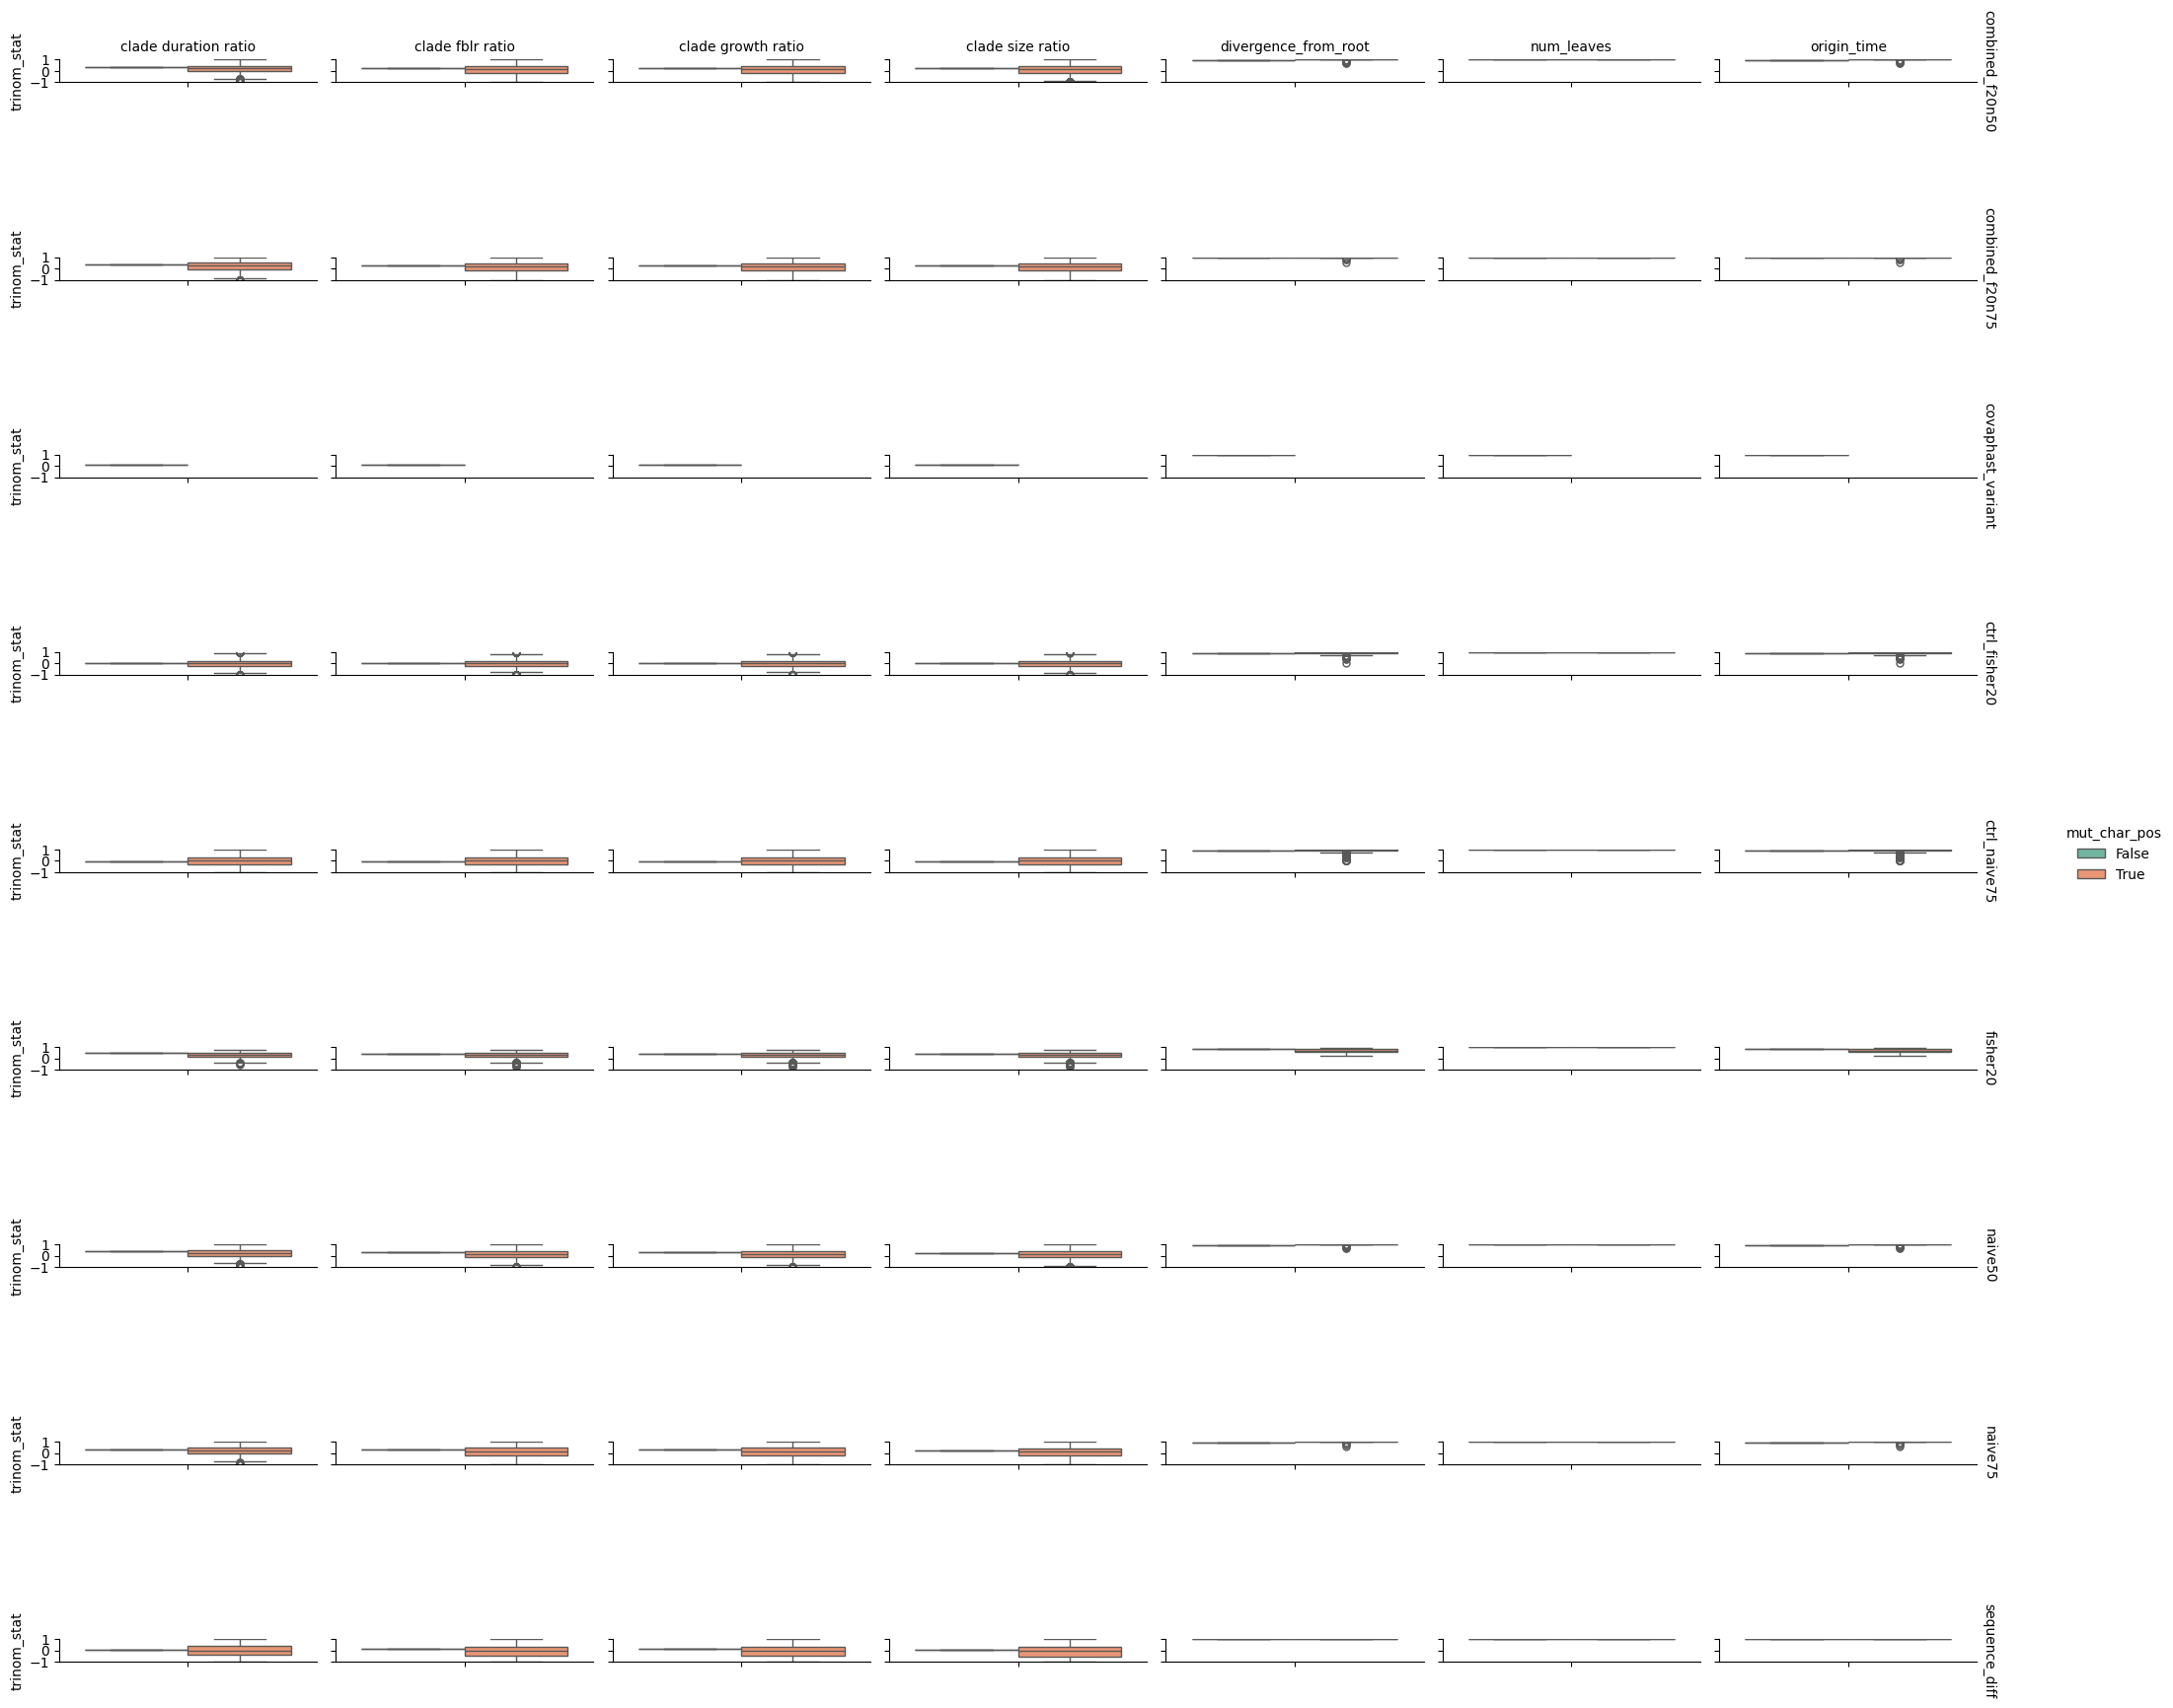

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


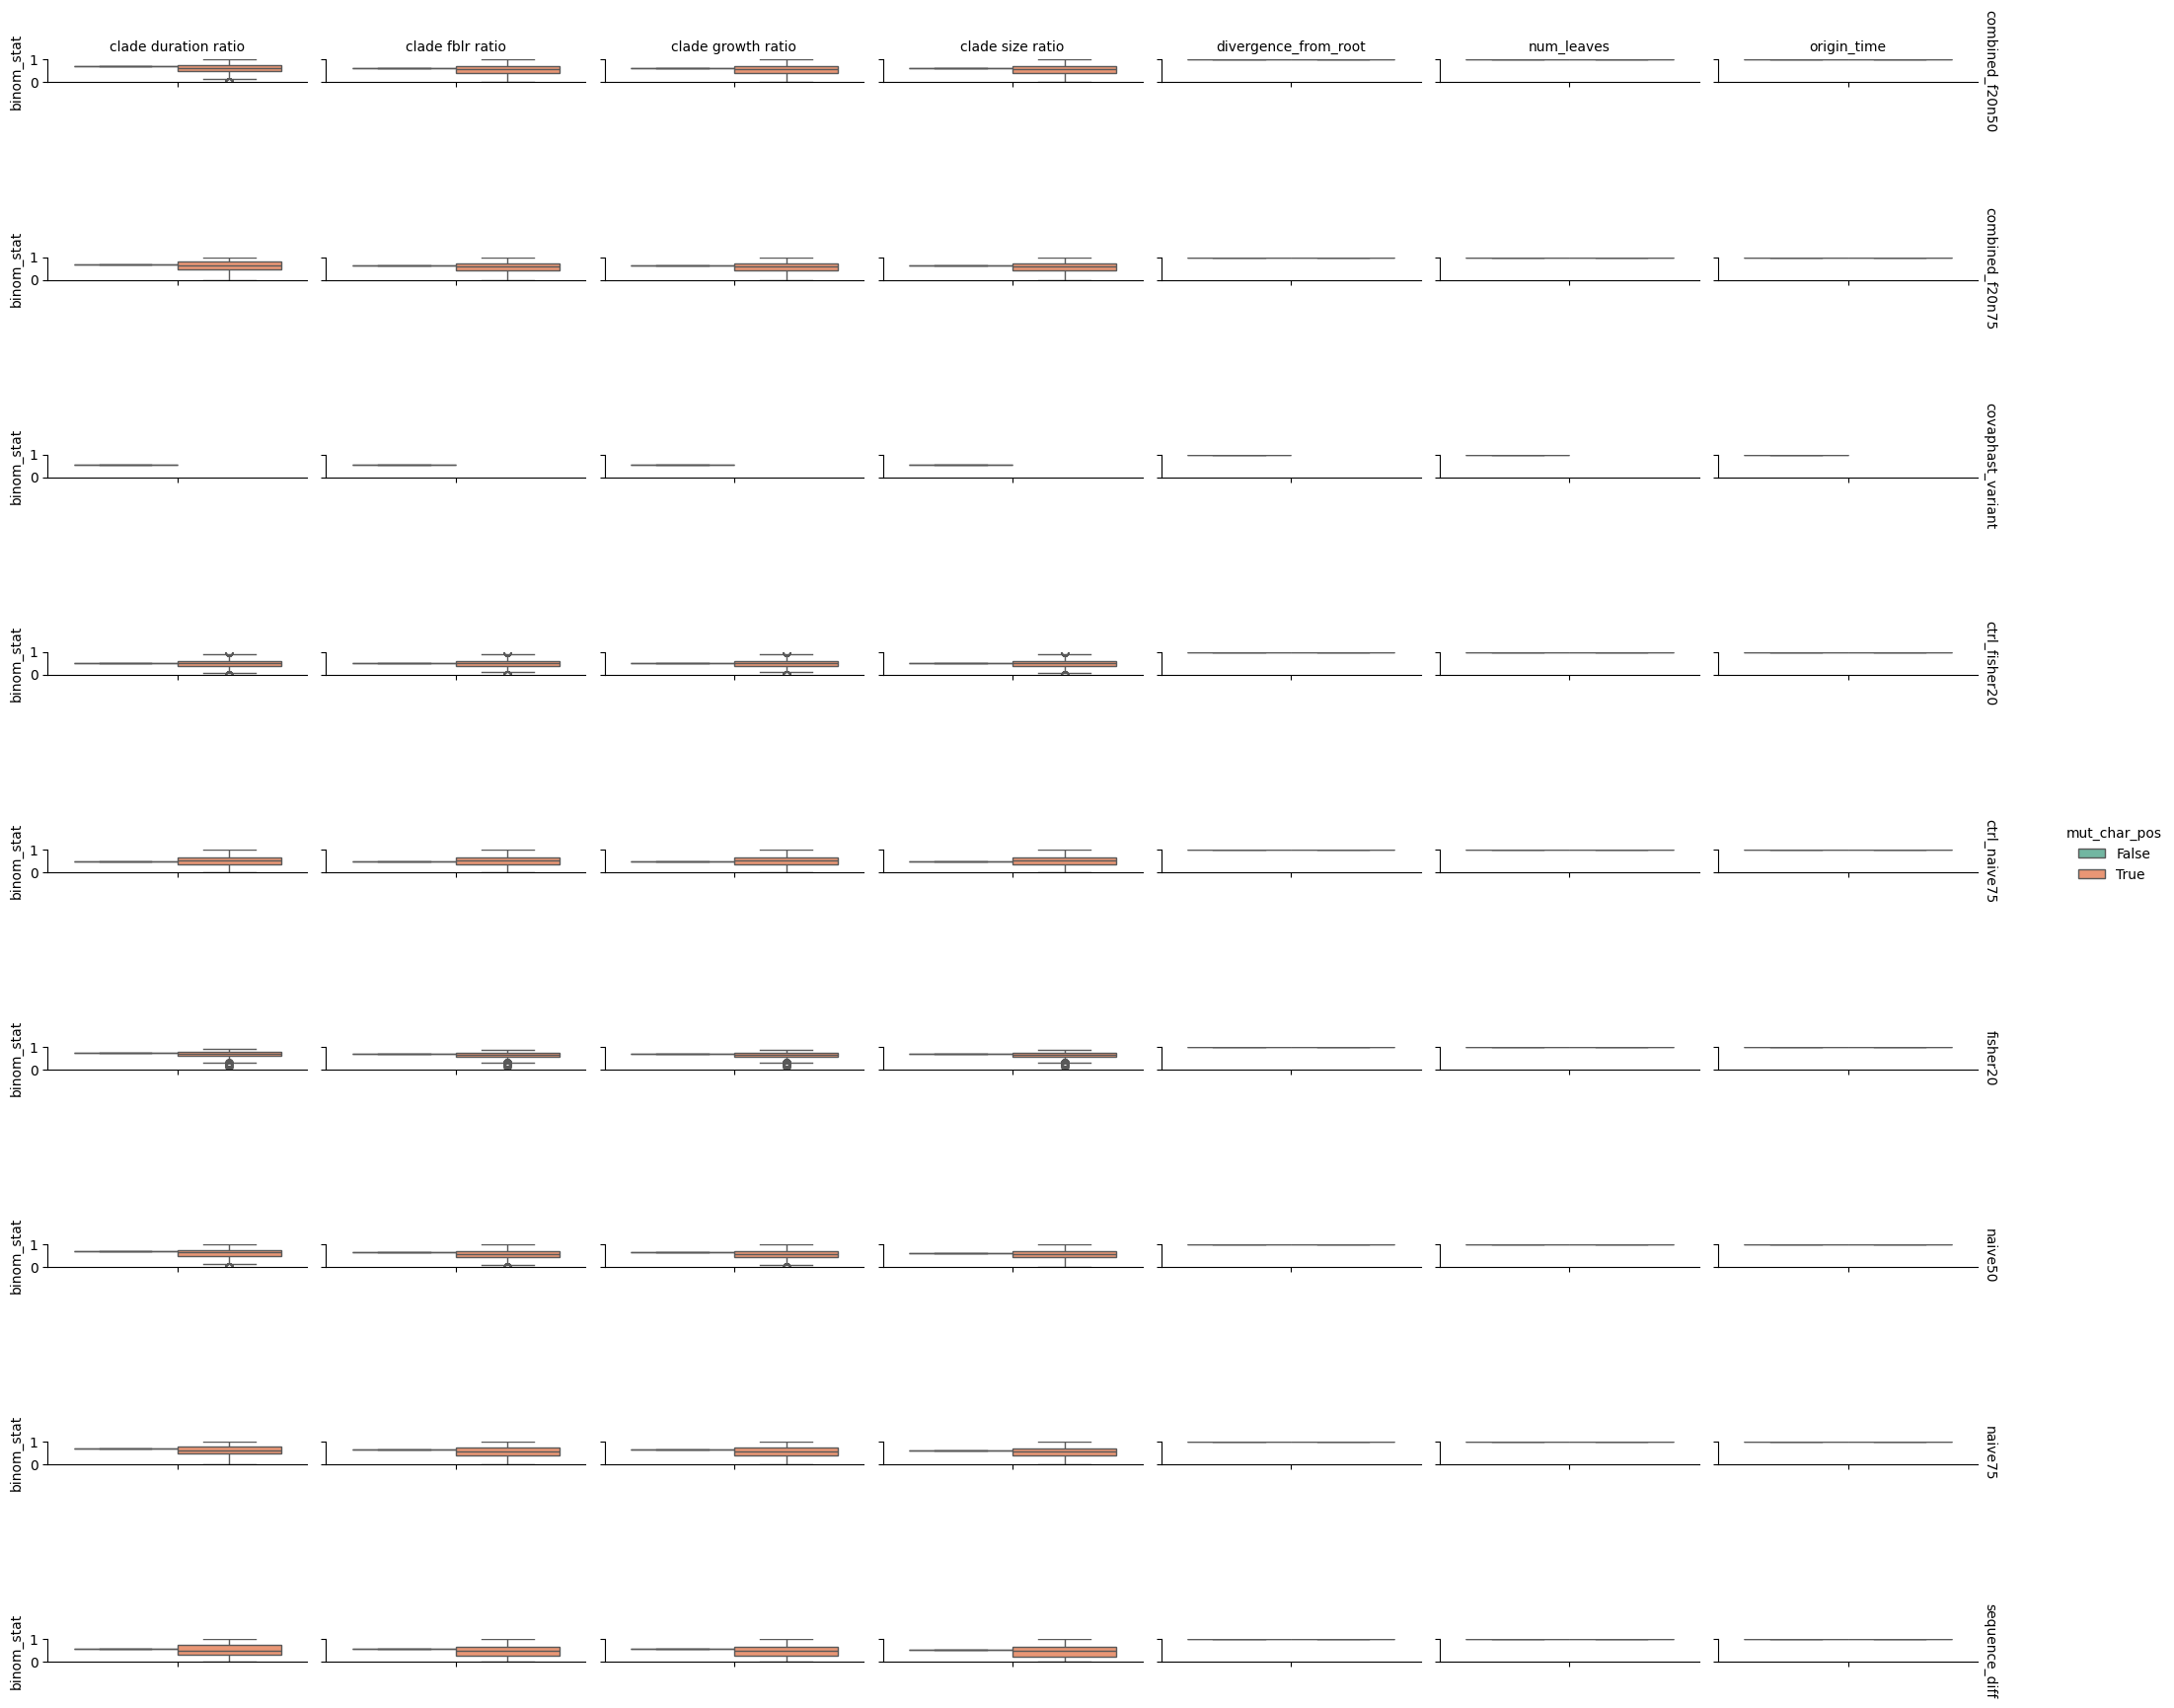

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


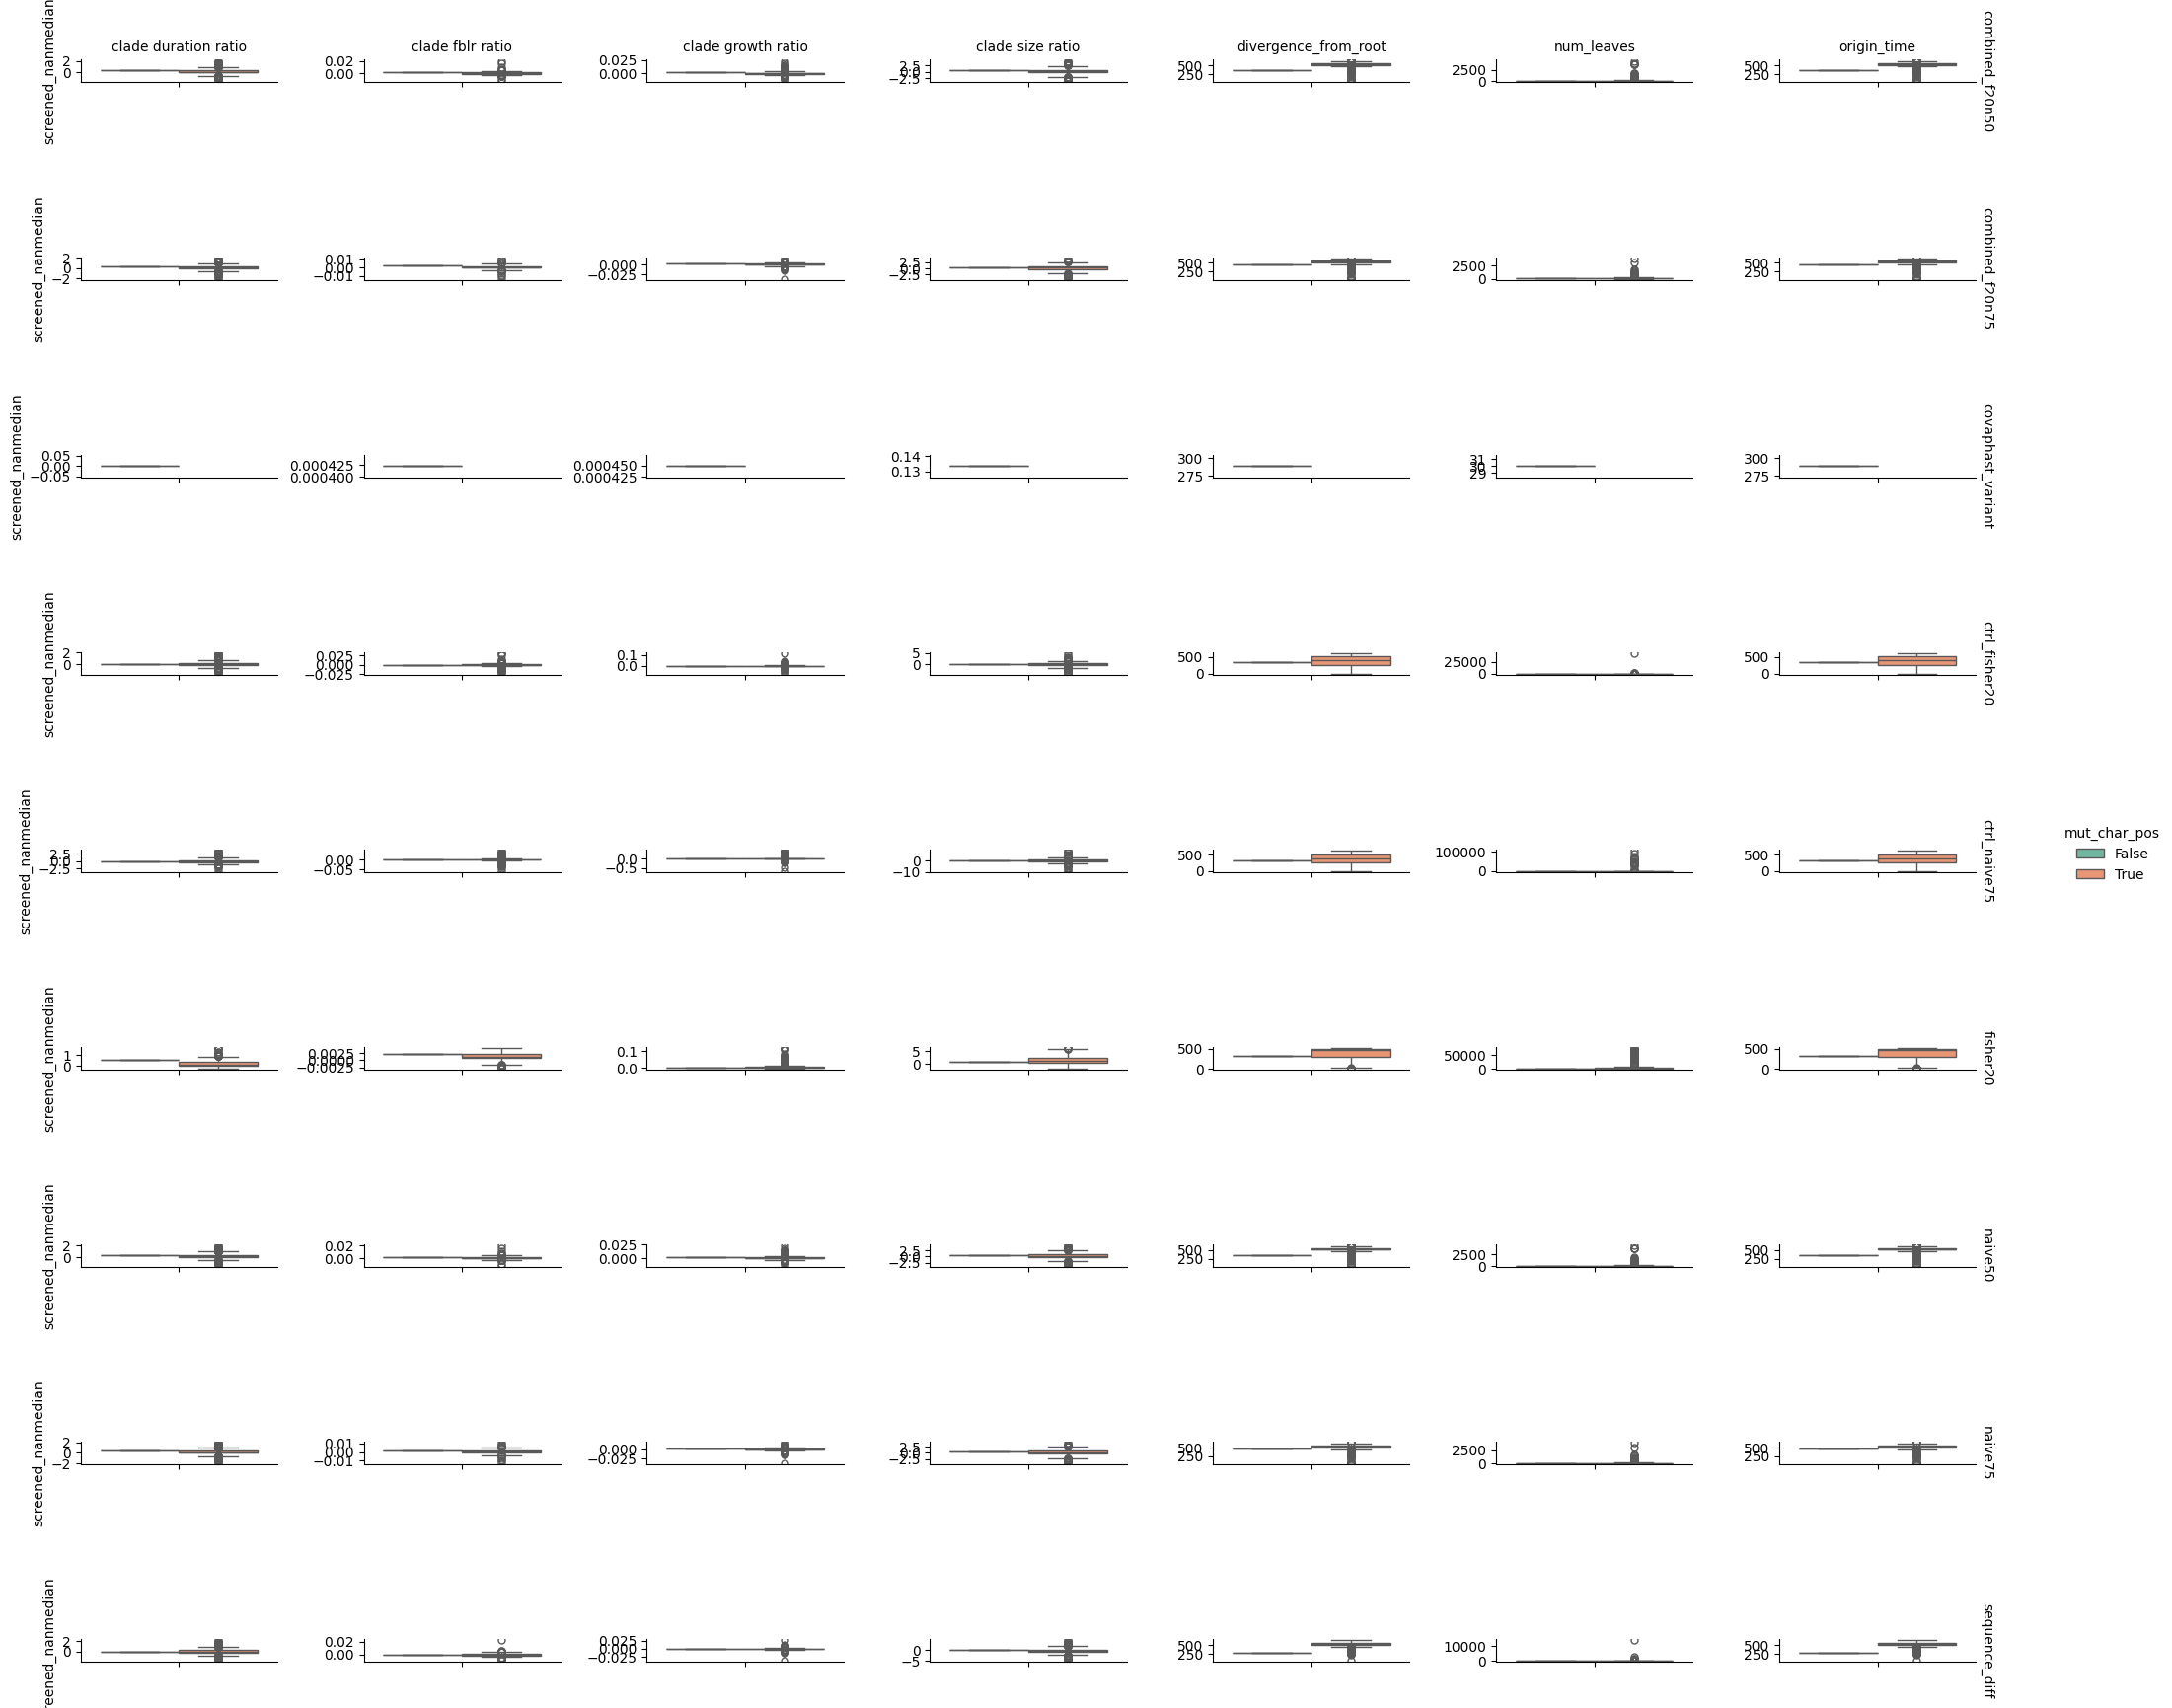

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


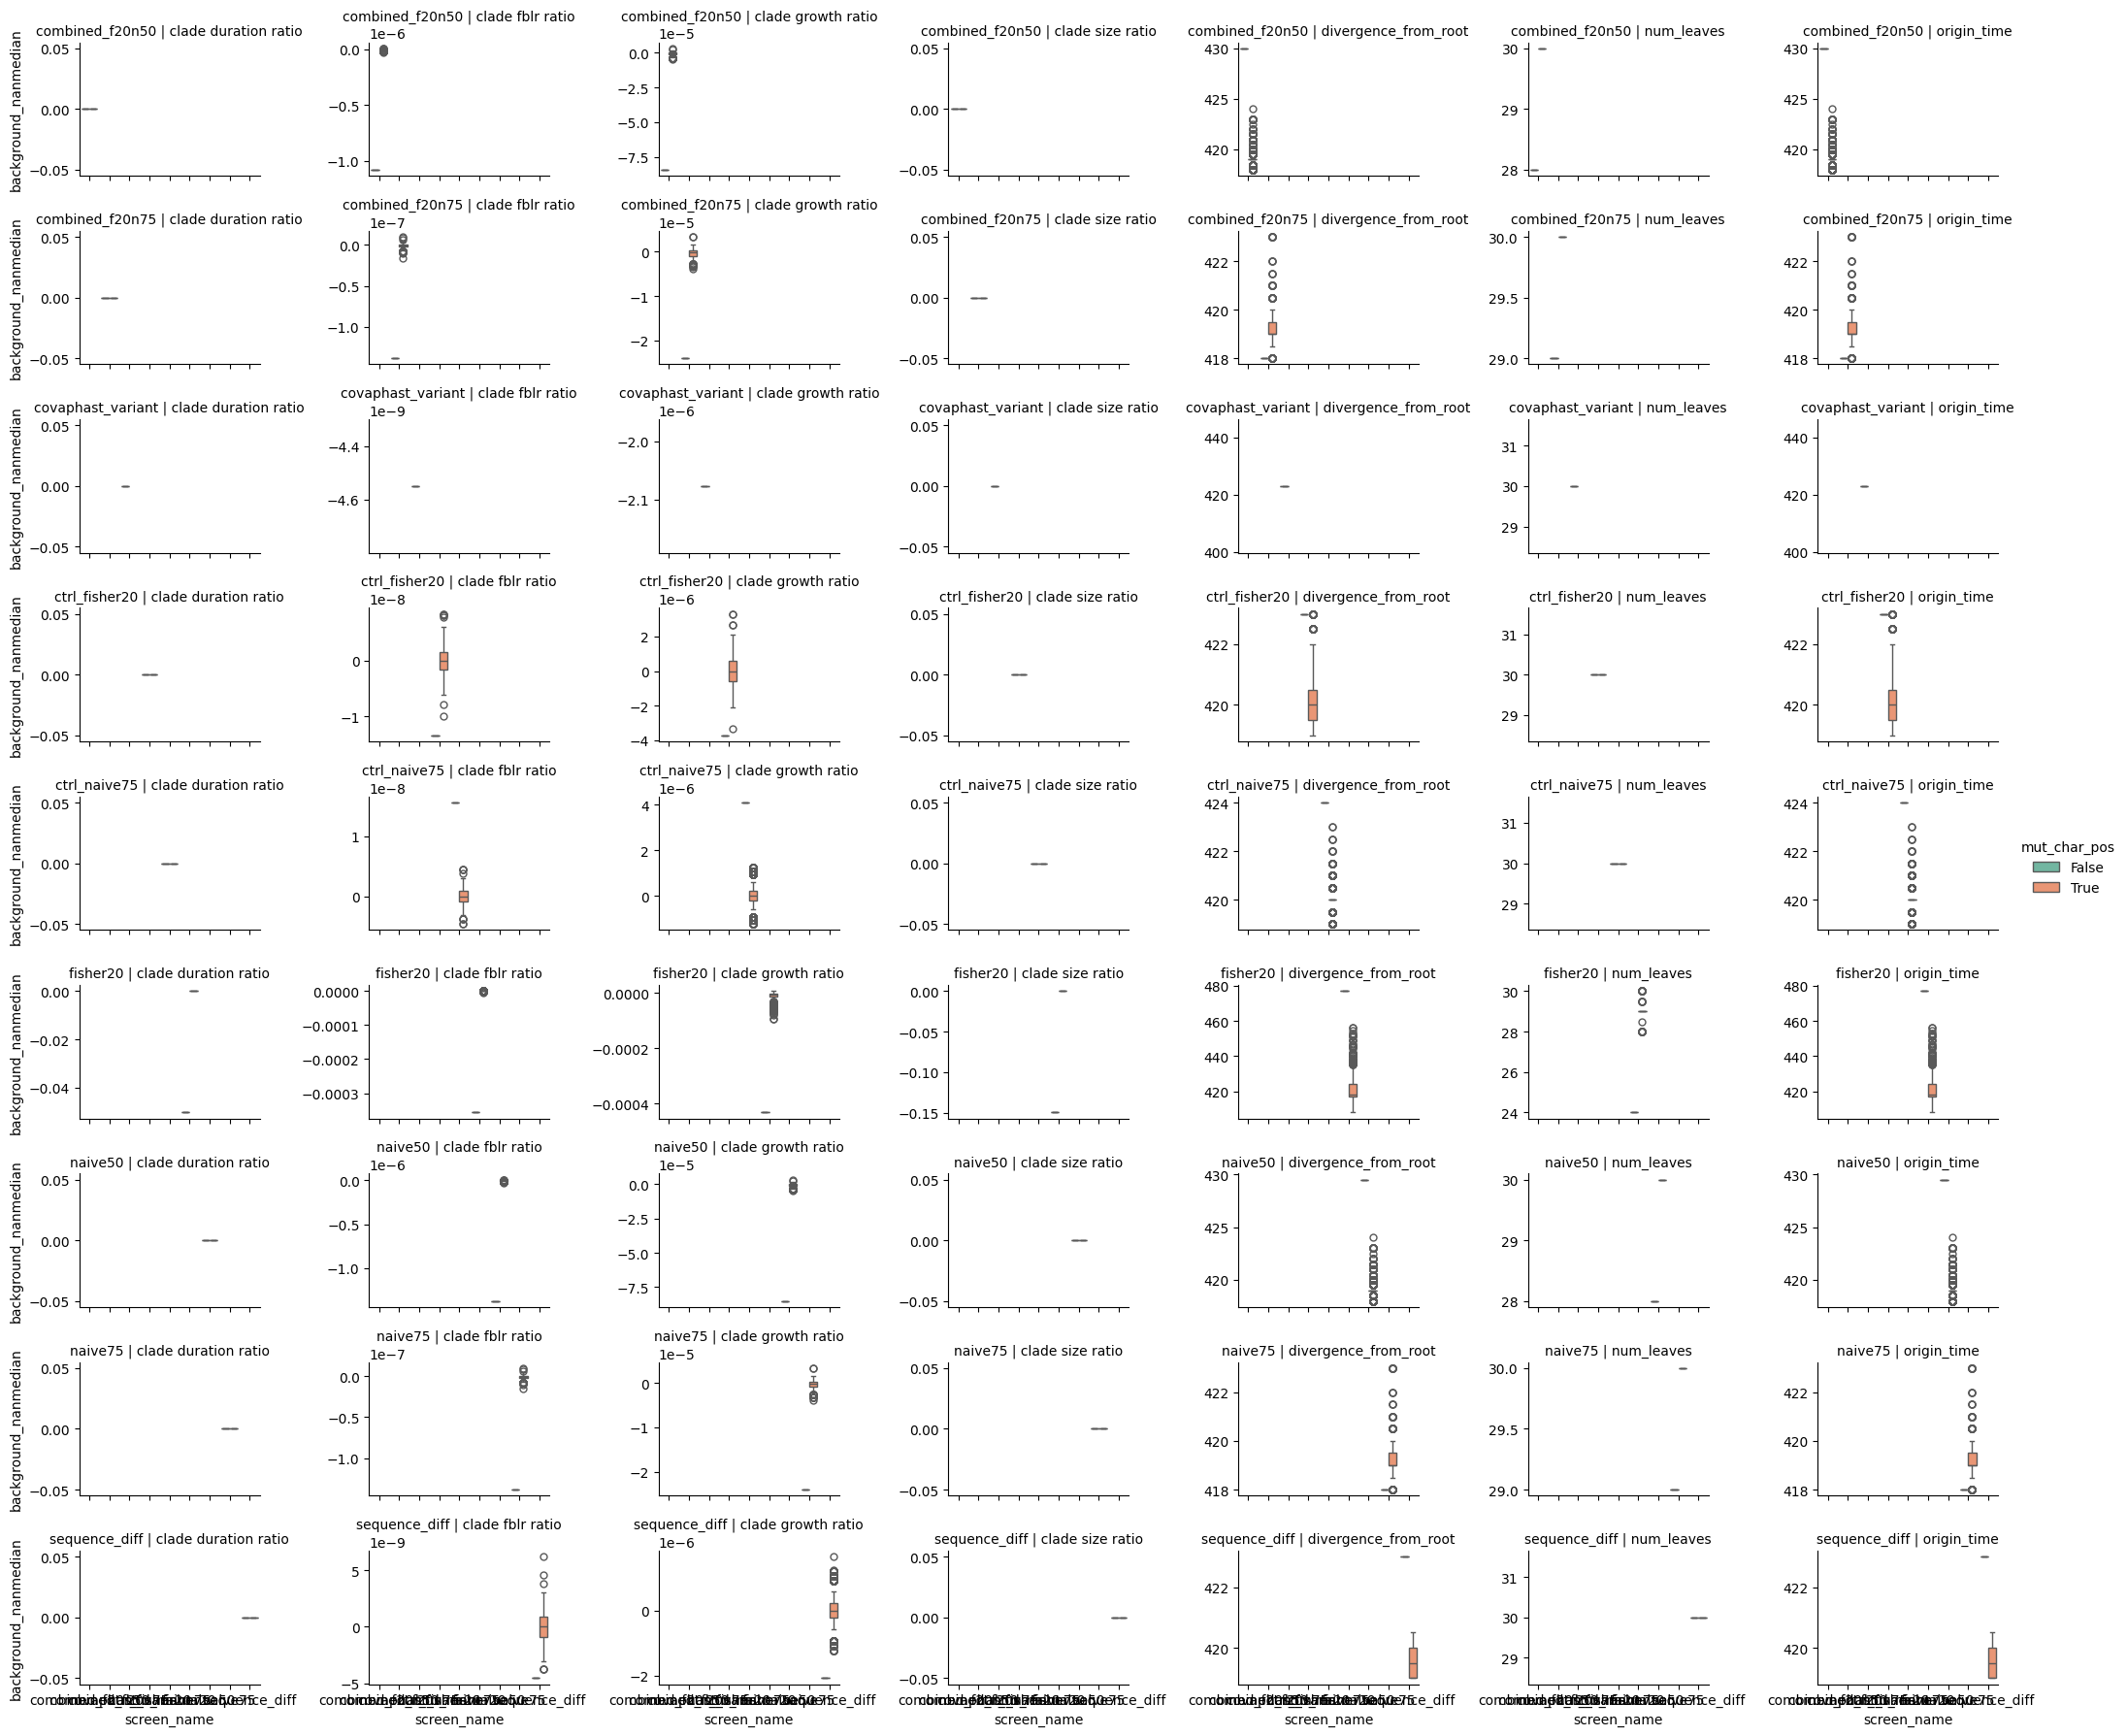

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
